In [ ]:
## ok got housing prices shown over time and in datetime after transposition for california, 

## look to cut down to the top 20 zips in 2016 then run it again to show trends in ca and then over all. 

In [1]:
## starting model refinement and testing in this notebook 

# Import our dependencies
import pandas as pd
from datetime import datetime



# Read in our ramen data
all_homes_df= pd.read_csv("../Resources/Predictions_Resources/housing_b4_encoding.csv",parse_dates=True)
# Read in our ramen data
all_homes_df
# # Print out the Country value counts
# country_counts = ramen_df.Country.value_counts()
# country_counts

,Unnamed: 0,RegionID,SizeRank,RegionName,State,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,0,6181,0,New York,NY,551506.0,553832.0,557083.0,560110.0,563034.0,...,659421.0,659007.0,658239.0,656925.0,655613.0,654394.0,653930.0,653901.0,653565.0,652307.0
1,1,12447,1,Los Angeles,CA,591562.0,593862.0,600103.0,604219.0,608947.0,...,712660.0,713807.0,715688.0,718245.0,721896.0,725180.0,730358.0,735910.0,744137.0,752508.0
2,2,39051,2,Houston,TX,162316.0,162904.0,162970.0,163390.0,164033.0,...,186844.0,187464.0,188070.0,188496.0,189125.0,189612.0,190179.0,190395.0,190938.0,191907.0
3,3,17426,3,Chicago,IL,217645.0,219082.0,220163.0,220675.0,221501.0,...,248372.0,248646.0,248725.0,248483.0,248278.0,248090.0,248029.0,248220.0,248599.0,249152.0
4,4,6915,4,San Antonio,TX,150402.0,151045.0,152099.0,153591.0,154631.0,...,182732.0,183350.0,183930.0,184846.0,185490.0,186244.0,186420.0,186962.0,187129.0,187718.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,27322,17541,29449,Columbus Township,PA,91814.0,91475.0,90859.0,90279.0,89396.0,...,85912.0,86201.0,86514.0,87365.0,87234.0,87160.0,86902.0,87095.0,87705.0,87924.0
17612,27323,20076,29449,Pursglove,WV,NaN,NaN,NaN,NaN,NaN,...,35891.0,36054.0,36024.0,36034.0,35844.0,36001.0,36098.0,36205.0,36059.0,35973.0
17613,27324,43205,29449,Tome,NM,102609.0,103567.0,103141.0,103043.0,104028.0,...,124700.0,124903.0,125228.0,125531.0,125908.0,126784.0,127890.0,129247.0,129959.0,131079.0
17614,27326,51821,29449,Eastabuchie,MS,66270.0,66382.0,66372.0,66543.0,66025.0,...,77737.0,78461.0,79138.0,79930.0,79683.0,79838.0,80272.0,80969.0,81871.0,82284.0


In [2]:
all_homes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17616 entries, 0 to 17615
Data columns (total 55 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17616 non-null  int64  
 1   RegionID    17616 non-null  int64  
 2   SizeRank    17616 non-null  int64  
 3   RegionName  17616 non-null  object 
 4   State       17616 non-null  object 
 5   2016-02-29  17191 non-null  float64
 6   2016-03-31  17200 non-null  float64
 7   2016-04-30  17213 non-null  float64
 8   2016-05-31  17234 non-null  float64
 9   2016-06-30  17260 non-null  float64
 10  2016-07-31  17274 non-null  float64
 11  2016-08-31  17285 non-null  float64
 12  2016-09-30  17297 non-null  float64
 13  2016-10-31  17333 non-null  float64
 14  2016-11-30  17348 non-null  float64
 15  2016-12-31  17361 non-null  float64
 16  2017-01-31  17396 non-null  float64
 17  2017-02-28  17404 non-null  float64
 18  2017-03-31  17418 non-null  float64
 19  2017-04-30  17428 non-nul

In [11]:
dates = pd.to_datetime(all_homes_df.columns[5:])

In [12]:
dates

DatetimeIndex(['2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31',
               '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30',
               '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31',
               '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31',
               '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30',
               '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
               '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31'],
              dtype='datetime64[ns]', freq=None)

In [16]:
df.columns = [f'{c}_some_suffix' for c in df]
df

all_home_df.columns = [f'{c}_some_suffix' for c in df]

In [2]:
all_homes_df.columns = all_homes_df.columns.strftime("%Y-%m-%d")

# 1) If all the columns are of type datetime64[ns] as you've mentioned, you can use strftime and remember
# to assign these changes back to the .columns attribute:

## how do I convert to datetime64[ns]

## link below 

# https://stackoverflow.com/questions/41907948/trying-to-convert-column-headings-which-are-in-datetime-datetime-format-2016-09

AttributeError: 'Index' object has no attribute 'strftime'

In [5]:
all_homes_df.columns[:5] = all_homes_df.columns.date

AttributeError: 'Index' object has no attribute 'date'

In [6]:
# import datetime

# mapper = lambda x: x.strftime("%Y-%m-%d") if isinstance(x, datetime.datetime) else x
# all_homes_df.columns = all_homes_df.columns.map(mapper)

In [ ]:
# df.columns = [str(col) + '_x' for col in df.columns]

# df = df.add_suffix('_some_suffix')

# Elegant In-place Concatenation
# If you're trying to modify df in-place, then the cheapest (and simplest) option is in-place addition directly on df.columns (i.e., using Index.__iadd__).

# df.columns += '_some_suffix'
# df


# Another cheap option is using a list comprehension with f-string formatting (available on python3.6+).

# df.columns = [f'{c}_some_suffix' for c in df]
# df


# Critique of add_*fix
# These are good methods if you're trying to perform method chaining:

# df.some_method1().some_method2().add_*fix(...)
# However, add_prefix (and add_suffix) creates a copy of the entire dataframe, just to modify the headers. If you believe this is wasteful, but still want to chain, you can call pipe:

# def add_suffix(df):
#     df.columns += '_some_suffix'
#     return df

# df.some_method1().some_method2().pipe(add_suffix)

In [ ]:
## going to try inversion method instead 

In [15]:
## select only data from ca area

df_ca=all_homes_df[all_homes_df["State"]=="CA"]
df_ca

,Unnamed: 0,RegionID,SizeRank,RegionName,State,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
1,1,12447,1,Los Angeles,CA,591562.0,593862.0,600103.0,604219.0,608947.0,...,712660.0,713807.0,715688.0,718245.0,721896.0,725180.0,730358.0,735910.0,744137.0,752508.0
8,8,54296,8,San Diego,CA,547892.0,546702.0,546601.0,548467.0,552595.0,...,648624.0,650704.0,652443.0,654566.0,656162.0,659380.0,663421.0,669118.0,673969.0,679568.0
11,11,33839,11,San Jose,CA,837360.0,840419.0,848110.0,846414.0,848728.0,...,1020983.0,1011978.0,1009994.0,1013576.0,1017264.0,1022024.0,1030142.0,1044256.0,1058211.0,1073255.0
14,14,20330,14,San Francisco,CA,1232255.0,1228967.0,1214661.0,1214696.0,1208545.0,...,1399537.0,1401434.0,1399378.0,1403962.0,1409597.0,1418410.0,1431606.0,1438161.0,1445113.0,1447191.0
30,30,20288,30,Sacramento,CA,265978.0,267371.0,269758.0,273150.0,275331.0,...,339633.0,339975.0,341084.0,343497.0,346338.0,349674.0,352270.0,355415.0,358467.0,362400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17528,27181,45482,29449,Goodyears Bar,CA,NaN,NaN,NaN,NaN,NaN,...,226964.0,227887.0,228845.0,229852.0,230907.0,232012.0,233165.0,234370.0,235836.0,237285.0
17561,27240,116564,29449,Mettler,CA,127012.0,126997.0,127993.0,128777.0,130378.0,...,185382.0,188094.0,190828.0,192433.0,193460.0,194754.0,195978.0,197878.0,200045.0,202004.0
17573,27255,40064,29449,North Palm Springs,CA,169743.0,171006.0,173300.0,175854.0,177838.0,...,245430.0,246947.0,248399.0,249511.0,251833.0,254023.0,256209.0,257153.0,258030.0,260092.0
17596,27294,36339,29449,Tecopa,CA,NaN,NaN,NaN,NaN,NaN,...,29709.0,29817.0,29917.0,30005.0,30078.0,30134.0,30172.0,30193.0,30257.0,30219.0


In [16]:
## drop unneeded columns
## dropped RegionID, City, State, Metro, CountyName
df_ca=df_ca.drop(["Unnamed: 0", "State", "SizeRank","RegionName"], axis=1)

In [17]:
##Rename RegionID to zipcode
df_ca.rename(columns={"RegionID": 'Zipcode'}, inplace=True)
df_ca.head()

,Zipcode,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
1,12447,591562.0,593862.0,600103.0,604219.0,608947.0,611310.0,615416.0,620355.0,625774.0,...,712660.0,713807.0,715688.0,718245.0,721896.0,725180.0,730358.0,735910.0,744137.0,752508.0
8,54296,547892.0,546702.0,546601.0,548467.0,552595.0,553595.0,557769.0,561389.0,566087.0,...,648624.0,650704.0,652443.0,654566.0,656162.0,659380.0,663421.0,669118.0,673969.0,679568.0
11,33839,837360.0,840419.0,848110.0,846414.0,848728.0,845240.0,852559.0,853288.0,858307.0,...,1020983.0,1011978.0,1009994.0,1013576.0,1017264.0,1022024.0,1030142.0,1044256.0,1058211.0,1073255.0
14,20330,1232255.0,1228967.0,1214661.0,1214696.0,1208545.0,1198375.0,1187458.0,1186359.0,1192592.0,...,1399537.0,1401434.0,1399378.0,1403962.0,1409597.0,1418410.0,1431606.0,1438161.0,1445113.0,1447191.0
30,20288,265978.0,267371.0,269758.0,273150.0,275331.0,277768.0,280609.0,283824.0,286194.0,...,339633.0,339975.0,341084.0,343497.0,346338.0,349674.0,352270.0,355415.0,358467.0,362400.0


In [18]:
len(df_ca)

924

In [19]:
df_ca.dropna(inplace=True)

In [20]:
len(df_ca)

906

In [7]:
# ## did knn pull off the dates from the index? need to use knn before this. 

# from sklearn.impute import KNNImputer
# KNN = KNNImputer()
# KNN.fit(df_ca)
# X = KNN.transform(df_ca)
# df_ca = pd.DataFrame(X, columns = df_ca.columns)
# df_ca.head()

In [27]:
# df_ca.dataframe tbody tr th {
#     vertical-align: top;
# }

# df_ca.dataframe thead th {
#     text-align: right;
# }


## dont know what this does 

SyntaxError: invalid syntax (<ipython-input-27-226ef63fb13c>, line 1)

In [21]:
##cast all zipcodes to string from integer
df_ca["Zipcode"]=df_ca["Zipcode"].astype(str)

In [22]:
## transpose dates to rows
df_ca=df_ca.transpose()
df_ca.head()

,1,8,11,14,30,33,43,45,57,58,...,17243,17357,17368,17420,17451,17480,17492,17561,17573,17598
Zipcode,12447,54296,33839,20330,20288,18203,46298,13072,47401,3506,...,23709,395428,9376,9014,39727,40858,30202,116564,40064,17380
2016-02-29,591562,547892,837360,1.23226e+06,265978,199072,502613,617754,345765,219630,...,125270,226338,146656,192804,226330,222267,306564,127012,169743,189209
2016-03-31,593862,546702,840419,1.22897e+06,267371,199840,504450,622227,347465,219821,...,125125,227293,146505,193309,225173,219628,308327,126997,171006,189087
2016-04-30,600103,546601,848110,1.21466e+06,269758,200721,509416,627714,349231,220212,...,125795,227795,146820,194065,225748,217854,309490,127993,173300,186966
2016-05-31,604219,548467,846414,1.2147e+06,273150,201720,512678,633327,351115,220102,...,126720,228194,147303,194733,226397,218488,311464,128777,175854,186391


In [23]:
## Renaming all columns to reflect the 18 zipcodes of D.C.

new_header=df_ca.iloc[0] ##grab all first row data for the column headers
df_ca=df_ca[1:] ## take all rows after first row
df_ca.columns=new_header ## assign all column headers to be equal to row 0 data
df_ca.head()

Zipcode,12447,54296,33839,20330,20288,18203,46298,13072,47401,3506,...,23709,395428,9376,9014,39727,40858,30202,116564,40064,17380
2016-02-29,591562,547892,837360,1.23226e+06,265978,199072,502613,617754,345765,219630,...,125270,226338,146656,192804,226330,222267,306564,127012,169743,189209
2016-03-31,593862,546702,840419,1.22897e+06,267371,199840,504450,622227,347465,219821,...,125125,227293,146505,193309,225173,219628,308327,126997,171006,189087
2016-04-30,600103,546601,848110,1.21466e+06,269758,200721,509416,627714,349231,220212,...,125795,227795,146820,194065,225748,217854,309490,127993,173300,186966
2016-05-31,604219,548467,846414,1.2147e+06,273150,201720,512678,633327,351115,220102,...,126720,228194,147303,194733,226397,218488,311464,128777,175854,186391
2016-06-30,608947,552595,848728,1.20854e+06,275331,202664,515934,639076,352406,220736,...,127892,228309,147322,195336,226893,220944,313129,130378,177838,185907


In [25]:
## TRY TO MAKE. an y from a row 

y = df_ca[-1:]
y 

Zipcode,12447,54296,33839,20330,20288,18203,46298,13072,47401,3506,...,23709,395428,9376,9014,39727,40858,30202,116564,40064,17380
2020-03-31,752508,679568,1.07326e+06,1.44719e+06,362400,258502,629202,801072,426801,256909,...,183800,269239,169393,218094,232766,257065,350384,202004,260092,227334


In [29]:
y = y.values.reshape(-1, 1)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [30]:
y

array([[752508.0],
       [679568.0],
       [1073255.0],
       [1447191.0],
       [362400.0],
       [258502.0],
       [629202.0],
       [801072.0],
       [426801.0],
       [256909.0],
       [644067.0],
       [593313.0],
       [320319.0],
       [317555.0],
       [313427.0],
       [569273.0],
       [907185.0],
       [1117349.0],
       [580729.0],
       [423560.0],
       [598590.0],
       [518706.0],
       [506347.0],
       [568595.0],
       [352851.0],
       [886160.0],
       [518721.0],
       [693428.0],
       [310330.0],
       [662566.0],
       [553421.0],
       [454353.0],
       [550634.0],
       [340320.0],
       [546877.0],
       [469705.0],
       [460976.0],
       [250625.0],
       [572381.0],
       [1708311.0],
       [412599.0],
       [879773.0],
       [682714.0],
       [731260.0],
       [444153.0],
       [606219.0],
       [571879.0],
       [745456.0],
       [269720.0],
       [497364.0],
       [599876.0],
       [452768.0],
       [

In [35]:
print(len(y))

906


TypeError: 'tuple' object is not callable

In [36]:
df_ca.index=pd.to_datetime(df_ca.index)
df_ca.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2016-02-29 to 2020-03-31
Columns: 906 entries, 12447 to 17380
dtypes: object(906)
memory usage: 354.3+ KB


In [37]:
df_ca.reset_index()
df_ca.head()

Zipcode,12447,54296,33839,20330,20288,18203,46298,13072,47401,3506,...,23709,395428,9376,9014,39727,40858,30202,116564,40064,17380
2016-02-29,591562,547892,837360,1.23226e+06,265978,199072,502613,617754,345765,219630,...,125270,226338,146656,192804,226330,222267,306564,127012,169743,189209
2016-03-31,593862,546702,840419,1.22897e+06,267371,199840,504450,622227,347465,219821,...,125125,227293,146505,193309,225173,219628,308327,126997,171006,189087
2016-04-30,600103,546601,848110,1.21466e+06,269758,200721,509416,627714,349231,220212,...,125795,227795,146820,194065,225748,217854,309490,127993,173300,186966
2016-05-31,604219,548467,846414,1.2147e+06,273150,201720,512678,633327,351115,220102,...,126720,228194,147303,194733,226397,218488,311464,128777,175854,186391
2016-06-30,608947,552595,848728,1.20854e+06,275331,202664,515934,639076,352406,220736,...,127892,228309,147322,195336,226893,220944,313129,130378,177838,185907


In [38]:
## cast all prices from strings to integers
df_ca=df_ca.astype(int)

Text(0, 0.5, 'Home Price $')

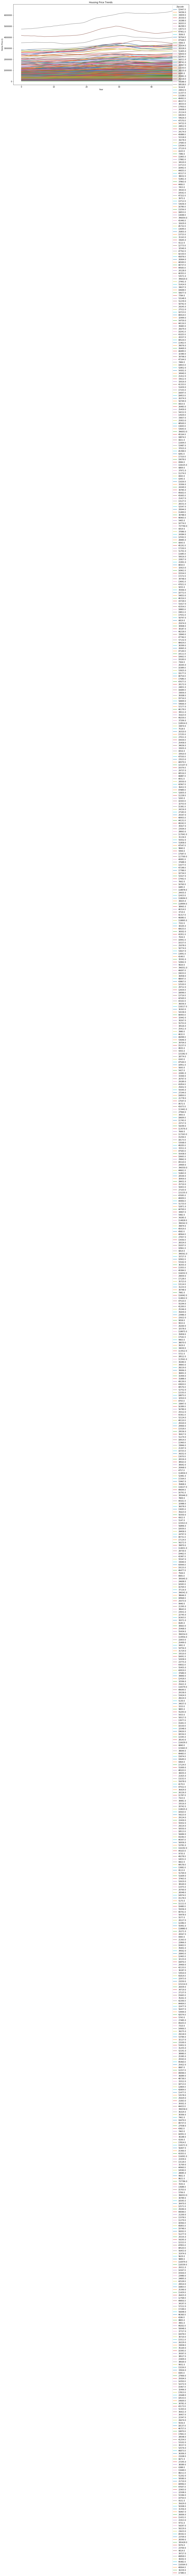

In [64]:
import matplotlib.pyplot as plt
df_ca.plot(figsize=(17,8))
plt.title("Housing Price Trends ")
plt.xlabel('Year')
plt.ylabel('Home Price $')
##top 3 zip codes have consistently been top 3 performers for the last 20 years
## bottom 3 zipcodes display little change over time in price compared to top priced zip codes
## all zip codes display a similar trend with a an inflection point for the year 2008 (housing recession)

In [ ]:
# ## run small city now to shrink data set again 
# small_cty = census_df.loc[(census_df["2010"] < 5000)].index
# small_cty

# census_df.drop(small_cty, inplace = True)